# Definitions of regions for freshwater source time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import warnings
warnings.filterwarnings('ignore')
import pickle
import matplotlib
from matplotlib.patches import Polygon 

%matplotlib inline

#### Parameters:

In [2]:
imin, imax = 1479, 2179
jmin, jmax = 159, 799
isize = imax-imin
jsize = jmax-jmin

#### Load files:

In [3]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])
tmask      = np.array(mesh.variables['tmask'][0,:,:,:])
Z_masked   = np.ma.masked_where((tmask > 0.1), tmask) 

#### Calculations:

In [4]:
mask_ini_CAA  = np.ones(mesh_lon.shape) # full domain size
mask_ini_CAA[0:imin+10, :] = 0 # remove the boundaries
mask_ini_CAA[imax-10:, :]  = 0
mask_ini_CAA[:, 0:jmin]    = 0
mask_ini_CAA[:, jmax-20:]  = 0

# Define CAA using the longitudes
mask_CAA = np.ma.masked_where((mesh_bathy >= 800), mask_ini_CAA)
mask_CAA = np.ma.masked_where(mesh_lon < -130, mask_CAA)

In [5]:
mask_ini_CB  = np.ones(mesh_lon.shape) # full domain size
mask_ini_CB[0:imin+10, :] = 0 # remove the boundaries
mask_ini_CB[imax-10:, :]  = 0
mask_ini_CB[:, 0:jmin]    = 0
mask_ini_CB[:, jmax-20:]  = 0

# Define Canada Basin using the 800 m contour and longitudes
mask_CB = np.ma.masked_where((mesh_bathy < 3200), mask_ini_CB)
mask_CB = np.ma.masked_where((mesh_lon > -80), mask_CB)

In [6]:
mask_ini_fullCB  = np.ones(mesh_lon.shape) # full domain size
mask_ini_fullCB[0:imin+10, :] = 0 # remove the boundaries
mask_ini_fullCB[imax-10:, :]  = 0
mask_ini_fullCB[:, 0+10:jmin] = 0
mask_ini_fullCB[:, jmax-20:]  = 0

# Define fullCB using the longitudes
mask_fullCB = np.ma.masked_where((mesh_bathy < 800), mask_ini_fullCB)
mask_fullCB = np.ma.masked_where((mesh_lon > -60), mask_fullCB)
mask_fullCB = np.ma.masked_where((mesh_lon > -100) & (mesh_lat < 78), mask_fullCB)

#### Figures:

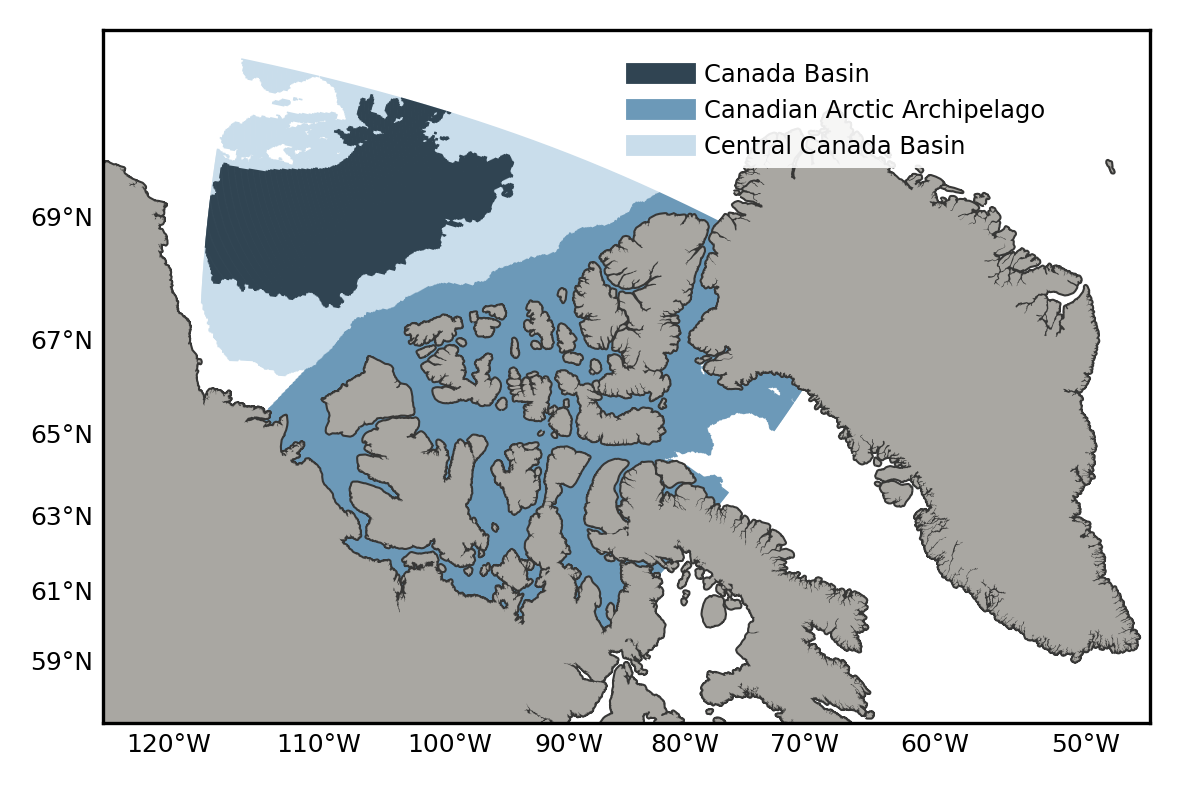

In [7]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon[:,:], mesh_lat[:,:]) 

# Draw domains:
proj1.plot(np.ma.masked_where(mask_fullCB==0, x_sub), np.ma.masked_where(mask_fullCB==0, y_sub), \
           '-', color='#c9ddeb', linewidth=0.4, zorder=1)
proj1.plot(np.ma.masked_where(mask_CB==0  , x_sub), np.ma.masked_where(mask_CB==0  , y_sub),\
           '-', color='#304452', linewidth=0.4, zorder=1)
proj1.plot(np.ma.masked_where(mask_CAA==0, x_sub), np.ma.masked_where(mask_CAA==0, y_sub),\
           '-', color='#6c99b8', linewidth=0.4, zorder=1)

# Legend entries
proj1.plot(0,0, '-', c='#304452', lw=5, label='Canada Basin');
proj1.plot(0,0, '-', c='#6c99b8', lw=5, label='Canadian Arctic Archipelago');
proj1.plot(0,0, '-', c='#c9ddeb', lw=5, label='Central Canada Basin');

leg = ax1.legend(loc=(0.5,0.8), fontsize=5.8, framealpha=0.9, frameon=True,fancybox=False)
leg.get_frame().set_linewidth(0.0)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/S10-region-definitions.png', bbox_inches='tight', dpi=300)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/S10-region-definitions.svg', bbox_inches='tight', dpi=300, \
#             format='svg')